# Restaurant Food Cost

**Project Description**

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

**You are provided with following 2 files:**

1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

**Dataset Attributes**

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for\
RESTAURANT_ID: A unique ID for each restaurant.\
CUISINES: The variety of cuisines that the restaurant offers.\
TIME: The open hours of the restaurant.\
CITY: The city in which the restaurant is located.\
LOCALITY: The locality of the restaurant.\
RATING: The average rating of the restaurant by customers.\
VOTES: The overall votes received by the restaurant.\
COST: The average cost of a two-person meal.


**1. Importing all required libraries**

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



import re

**2. Importing data**

In [181]:
df1 = pd.read_excel('Data_Train.xlsx')
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


I have imported excel data into jupyter notebook.

In [182]:
df = pd.DataFrame(df1)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [183]:
df.shape

(12690, 9)

We have 12690 rows and 9 columns in our dataset.

In [184]:
# First 5 rows

In [185]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [186]:
# Last 5 rows

In [187]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [188]:
# Getting All columns information

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Out of 8 variables, 2 are numerical and 6 are categorical datatypes.

Cost is our output/dependent variable. Rest are independent variable.

In [190]:
# Checking for null values

In [191]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

<Axes: >

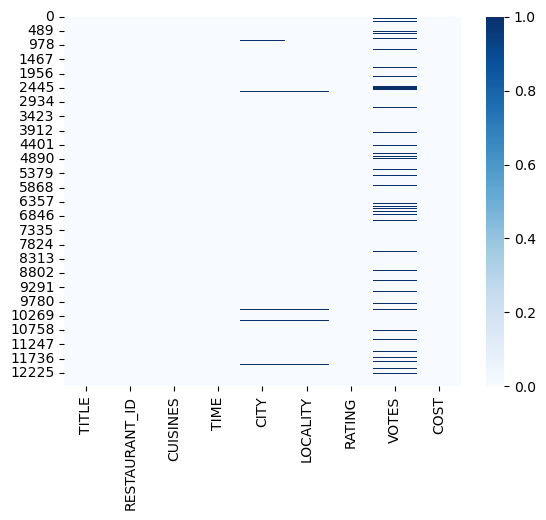

In [192]:
sns.heatmap(df.isnull(), cmap='Blues')

From above, we can see there are null values present in City, Locality, Rating, and Votes column. We will need to treat these null values later for our model to predict and learn the data accurately.

In [193]:
# Checking for unique values 

In [194]:
for i in df.columns[:-1]:
    print(i,":",df[i].nunique())

TITLE : 113
RESTAURANT_ID : 11892
CUISINES : 4155
TIME : 2689
CITY : 359
LOCALITY : 1416
RATING : 32
VOTES : 1847


from above, we can see unique values in each column

In [195]:
# We can remove restaurant_ID from our dataset as we dont require it for prediction

In [196]:
df.drop(['RESTAURANT_ID'] ,axis=1,inplace=True)

In [197]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [198]:
# Checking unique title values

In [199]:
df.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

From above we can see, there is a lot of repeated data. Titles like Dining, Casual Dining, Fine Dining means a same. So we can replace it just as dining. Also, cafe and Irani cafe as Cafe only. We can use Binning technic here.

In [200]:
# Casual Dining

In [201]:
dine = df[df.TITLE.str.contains('DINING')].TITLE.value_counts().index

In [202]:
dine

Index(['CASUAL DINING', 'CASUAL DINING,BAR', 'FINE DINING',
       'BAR,CASUAL DINING', 'CASUAL DINING,CAFÉ', 'CAFÉ,CASUAL DINING',
       'FINE DINING,BAR', 'PUB,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,PUB',
       'CASUAL DINING,LOUNGE', 'CASUAL DINING,MICROBREWERY',
       'FINE DINING,LOUNGE', 'BAR,FINE DINING', 'CASUAL DINING,BAKERY',
       'CASUAL DINING,SWEET SHOP', 'QUICK BITES,CASUAL DINING',
       'CASUAL DINING,IRANI CAFE', 'COCKTAIL BAR,CASUAL DINING',
       'CASUAL DINING,CLUB', 'SWEET SHOP,CASUAL DINING', 'FINE DINING,CAFÉ',
       'CASUAL DINING,FOOD COURT', 'BEVERAGE SHOP,CASUAL DINING',
       'CASUAL DINING,DESSERT PARLOR', 'LOUNGE,FINE DINING',
       'CAFÉ,FINE DINING'],
      dtype='object')

In [203]:
# Now we will map it to datset

In [204]:
df.TITLE.replace(to_replace=dine,value='CASUAL DINING', inplace = True)

In [205]:
# CAFE 

In [206]:
caf = df[df.TITLE.str.contains('CAFE')].TITLE.value_counts().index

#mapping

df.TITLE.replace(to_replace=caf,value='CAFEE', inplace = True)

In [207]:
#Quick Bites

In [208]:
quick = df[df.TITLE.str.contains('BITES')].TITLE.value_counts().index

#mapping

df.TITLE.replace(to_replace=quick,value='QUICK BITES', inplace = True)

In [209]:
#DESERT PARLOUR

In [210]:
des = df[df.TITLE.str.contains('DESSERT')].TITLE.value_counts().index

#mapping

df.TITLE.replace(to_replace=des,value='DESSERT PARLOUR', inplace = True)

In [211]:
# SHOP

In [212]:
sho = df[df.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index

#mapping

df.TITLE.replace(to_replace=sho,value='BEVERAGE SHOP', inplace = True)

In [213]:
#Binning BAR and PUB 

bar = df[df.TITLE.str.contains('BAR|PUB')].TITLE.value_counts().index
df.TITLE.replace(to_replace=bar,value='BAR & PUB',inplace=True)

#Binning BAKERY, CONFECTIONARY, SWEET SHOP

bakery = df[df.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')].TITLE.value_counts().index
df.TITLE.replace(to_replace=bakery,value='BAKERY and SWEETS',inplace=True)

#Binning MICROBRWERY, LOUNGE, CLUBS

lounge = df[df.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')].TITLE.value_counts().index
df.TITLE.replace(to_replace=lounge,value='LOUNGE CLUB',inplace=True)

# Binning FOOD COURT, FOOD TRUCK and KIOSK 

food = df[df.TITLE.str.contains('FOOD COURT|FOOD TRUCK|KIOSK')].TITLE.value_counts().index
df.TITLE.replace(to_replace=food,value='FOOD COURTTRUCK',inplace=True)

# Binning DHABA and MESS 
dhaba = df[df.TITLE.str.contains('MESS|DHABA|BHOJANALYA')].TITLE.value_counts().index
df.TITLE.replace(to_replace=dhaba,value='DHABA',inplace=True)

# Binning PAAN and MEAT SHOP
paan = df[df.TITLE.str.contains('PAAN')].TITLE.value_counts().index
df.TITLE.replace(to_replace=paan,value='FOOD_COURTTRUCK',inplace=True)

In [214]:
df['TITLE'].value_counts()

CASUAL DINING        4737
QUICK BITES          4594
None                 1003
CAFÉ                  607
DESSERT PARLOUR       541
BAKERY and SWEETS     397
BAR & PUB             245
BEVERAGE SHOP         166
FOOD COURTTRUCK       162
LOUNGE CLUB           135
DHABA                  98
FOOD_COURTTRUCK         4
MEAT SHOP               1
Name: TITLE, dtype: int64

There are some 'None' values in the Title column. Lets replace these missing values with NaN

In [215]:
df.TITLE.replace('None', np.nan, inplace=True)

In [216]:
df['TITLE'].value_counts()

CASUAL DINING        4737
QUICK BITES          4594
CAFÉ                  607
DESSERT PARLOUR       541
BAKERY and SWEETS     397
BAR & PUB             245
BEVERAGE SHOP         166
FOOD COURTTRUCK       162
LOUNGE CLUB           135
DHABA                  98
FOOD_COURTTRUCK         4
MEAT SHOP               1
Name: TITLE, dtype: int64

So we have replaced missing values ith nan

Also, we have reduced the Title categories using Binning method.

<Axes: xlabel='TITLE', ylabel='count'>

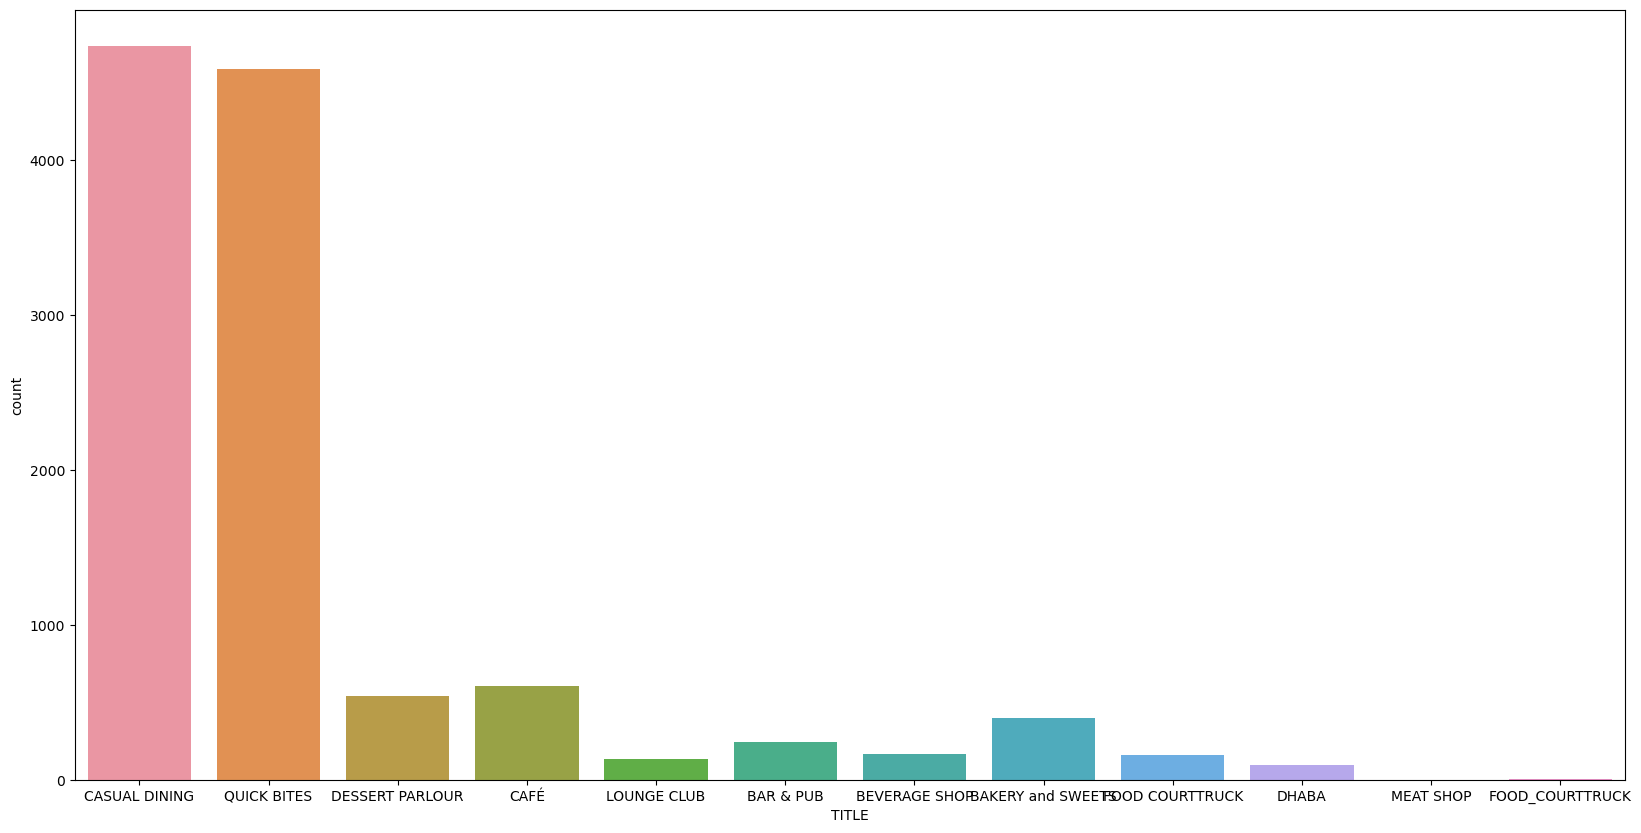

In [217]:
plt.figure(figsize = (20,10))
sns.countplot(data = df,x='TITLE')

From above countplot, we can see most of the food titles are Casual diing and Quick Bites

Now that we are done with Title column, we can check all other columns and use binning whenever necessary.

In [218]:
# Checking Cuisines column

In [219]:
df.CUISINES.unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [220]:
#North_Indian_Cuisine

df['n_indian_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('North Indian'),1)
df['n_indian_cuisine'] = df['n_indian_cuisine'].mask(~df.CUISINES.str.contains('North Indian'),0)

#South_Indian_Cuisine 
df['s_indian_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('South Indian'),1)
df['s_indian_cuisine'] = df['s_indian_cuisine'].mask(~df.CUISINES.str.contains('South Indian'),0)

#Chinese_Cuisine 
df['chinese_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('Chinese'),1)
df['chinese_cuisine'] = df['chinese_cuisine'].mask(~df.CUISINES.str.contains('Chinese'),0)

#bakery_desserts_Cuisine 
df['bakery_desserts_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),1)
df['bakery_desserts_cuisine'] = df['bakery_desserts_cuisine'].mask(~df.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),0)

#fast_food_Cuisine 
df['fast_food_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),1)
df['fast_food_cuisine'] = df['fast_food_cuisine'].mask(~df.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),0)

#regional_Cuisine 
df['regional_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'),1)
df['regional_cuisine'] = df['regional_cuisine'].mask(~df.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'),0)

#beverage_Cuisine
df['beverage_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('Beverage|Cafe|Juices'),1)
df['beverage_cuisine'] = df['beverage_cuisine'].mask(~df.CUISINES.str.contains('Beverage|Cafe|Juices'),0)

#non_Indian_Cuisine 
df['non_indian_cuisine'] = df.CUISINES.mask(df.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),1)
df['non_indian_cuisine'] = df['non_indian_cuisine'].mask(~df.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),0)

In [221]:
df.CUISINES.unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [222]:
#Checking City column

In [223]:
df.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [224]:
df['CITY'].value_counts().head(10)

Chennai         2174
Bangalore       2149
Hyderabad       1819
Mumbai          1722
New Delhi       1321
Kochi           1279
Gurgaon          379
Secunderabad     310
Noida            211
Navi Mumbai      165
Name: CITY, dtype: int64

In [225]:
df.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [226]:
#getting top most cities 

In [227]:
topcities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi']
for city in topcities:
    print(city)
    tempcity = df[df.CITY.str.contains(city,na=False)].CITY.value_counts().index
    print(tempcity)
    df.CITY.replace(to_replace=tempcity,value=city,inplace=True)
                            
other = df[~df.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi',na=False)].CITY.value_counts().index
# mapper
df.CITY.replace(to_replace=other,value='Others',inplace=True)

Chennai
Index(['Chennai', 'Chennai.', 'Chennai Teynampet', 'Chennai Mahabalipuram',
       'Chennai- 600107', 'Chennai - 34 Landmark - Near Loyola College',
       'Chennai Chrompet', 'Chennai-40', 'Chennai Opposite 5C Bus stand',
       'Chennai (Bang Opposite Indian Bank)', 'ECR NEELANKARAI Chennai 600115',
       'Chennai Thousand Lights', 'Chennai Thuraipakkam', 'Chennai Perungudi',
       'Mogappair. Chennai', 'Chennai opp: Vasanth & co', 'Chennai Kovalam',
       'Chennai Padur', 'Chennai - 600040', 'Chennai 600034.',
       'Chennai. (Near Hotel Matshya)'],
      dtype='object')
Bangalore
Index(['Bangalore', 'Bangalore.',
       'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
       'Bangalore Road', 'Malleshwaram Bangalore', 'Bangalore 560076',
       'Phase 1 Bangalore', 'Bangalore land mark above mahaveer hard ware',
       'Bangalore - 560103', 'Bangalore Koramangala 7th Block',
       'Bangalore-560066', 'BTM Bangalore',
       'Banaswadi (

In [228]:
df.CITY.value_counts()

Chennai      2199
Bangalore    2167
Mumbai       1907
Others       1846
Hyderabad    1833
New Delhi    1329
Kochi        1297
Name: CITY, dtype: int64

In [229]:
#Checkin time column

In [230]:
df.TIME.value_counts()

11am – 11pm (Mon-Sun)                                 1415
12noon – 12midnight (Mon-Sun)                          469
12noon – 11pm (Mon-Sun)                                407
11am – 12midnight (Mon-Sun)                            310
10am – 10pm (Mon-Sun)                                  221
                                                      ... 
10am – 10pm (Mon-Fri),8:30am – 10pm (Sat-Sun)            1
12noon – 3:30pm, 6pm – 10:30pm (Mon-Thu),12noon...       1
12noon – 5:30pm, 7pm – 11pm (Mon-Sun)                    1
12midnight – 11:45pm (Mon-Sun)                           1
12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...          1
Name: TIME, Length: 2689, dtype: int64

In [231]:
df[df.TIME.str.contains('Closed')].TIME
df[df.TIME.str.contains(r"Closed (.*?)\)")].TIME
closedday = []
for i,p in enumerate(df.TIME): 
    print(i)
    print(p)
    try:
        temp = re.findall(pattern=r"Closed (.*?)\)",string=p)
        temp = re.sub(pattern='\(',repl='',string=temp[0])
        closedday.append(temp)

    except:
        closedday.append('Never Closed')
        print(temp)

0
11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
[]
1
6pm – 11pm (Mon-Sun)
[]
2
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
3
11:30am – 1am (Mon-Sun)
[]
4
11am – 1am (Mon-Sun)
[]
5
12noon – 12:30AM (Mon-Sun)
[]
6
12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun)...
[]
7
1pm – 1am (Mon-Sun)
[]
8
7am – 10:30pm (Mon-Sun)
[]
9
11am – 2pm, 4pm – 10:30pm (Mon-Sun)
[]
10
12:30pm – 12:30AM (Mon-Sun)
[]
11
11am – 12:15AM (Mon, Tue, Wed, Thu, Fri, Sun)...
[]
12
11am – 11pm (Mon-Sun)
[]
13
11am – 11:30pm (Mon-Sun)
[]
14
Closed (Mon),11am – 11pm (Tue-Sun)
15
11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...
[]
16
7:30am – 12midnight (Mon-Sun)
[]
17
11am – 12midnight (Mon-Sun)
[]
18
11am – 11:45pm (Mon-Sun)
[]
19
Closed (Mon),9am – 10pm (Tue-Sun)
20
9:30am – 10pm (Mon-Sun)
[]
21
10:30am – 11:30pm (Mon-Sun)
[]
22
11am – 3am (Mon-Sun)
[]
23
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
24
11am – 11pm (Mon-Sun)
[]
25
12noon – 11pm (Mon-Sun)
[]
26
12:30pm – 11pm (Mon-Thu),12:30pm – 11:30pm...
[]
27
Closed (Mon),12noon – 3pm, 6

C:\Users\patil\AppData\Local\Temp\ipykernel_12348\1942492624.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.TIME.str.contains(r"Closed (.*?)\)")].TIME


In [232]:
# Checking VOTES column

In [233]:
df.VOTES.dtypes

dtype('O')

Votes is defined as obeject type in our dataset. So we will ned to covert it into numerical form.

In [234]:
df.VOTES = df.dropna().VOTES.apply(lambda x : float(x[:2]))

In [235]:
df.VOTES.dtypes

dtype('float64')

In [236]:
#Checking RATING column

In [237]:
df.RATING.dtypes

dtype('O')

We have to change rating column data types from objet to numercial form

In [238]:
df.RATING = df.dropna().RATING.apply(lambda x: float(x[:2]))

In [239]:
df.RATING.dtypes

dtype('float64')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TITLE                    11687 non-null  object 
 1   CUISINES                 12690 non-null  object 
 2   TIME                     12690 non-null  object 
 3   CITY                     12578 non-null  object 
 4   LOCALITY                 12592 non-null  object 
 5   RATING                   10593 non-null  float64
 6   VOTES                    10593 non-null  float64
 7   COST                     12690 non-null  int64  
 8   n_indian_cuisine         12690 non-null  object 
 9   s_indian_cuisine         12690 non-null  object 
 10  chinese_cuisine          12690 non-null  object 
 11  bakery_desserts_cuisine  12690 non-null  object 
 12  fast_food_cuisine        12690 non-null  object 
 13  regional_cuisine         12690 non-null  object 
 14  beverage_cuisine      

In [241]:
df.isnull().sum()

TITLE                      1003
CUISINES                      0
TIME                          0
CITY                        112
LOCALITY                     98
RATING                     2097
VOTES                      2097
COST                          0
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

As we have seen previously, we have null/missing values present in our dataset. lets fix it.

In [242]:
df.RATING.mask(df.RATING == '-',np.nan,inplace=True)
df.RATING = df.RATING.astype('float')

We can convert categorical variable to numerical form using label encoder

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TITLE                    11687 non-null  object 
 1   CUISINES                 12690 non-null  object 
 2   TIME                     12690 non-null  object 
 3   CITY                     12578 non-null  object 
 4   LOCALITY                 12592 non-null  object 
 5   RATING                   10593 non-null  float64
 6   VOTES                    10593 non-null  float64
 7   COST                     12690 non-null  int64  
 8   n_indian_cuisine         12690 non-null  object 
 9   s_indian_cuisine         12690 non-null  object 
 10  chinese_cuisine          12690 non-null  object 
 11  bakery_desserts_cuisine  12690 non-null  object 
 12  fast_food_cuisine        12690 non-null  object 
 13  regional_cuisine         12690 non-null  object 
 14  beverage_cuisine      

In [264]:
df['CLOSED'] = closedday

In [265]:
df[df.CLOSED != 'Never Closed']

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine,CLOSED
14,QUICK BITES,Maharashtrian,"Closed (Mon),11am – 11pm (Tue-Sun)",Others,Majiwada,4.0,16.0,300,0,0,0,0,0,1,0,0,Mon
19,QUICK BITES,"Bakery, Fast Food, Momos","Closed (Mon),9am – 10pm (Tue-Sun)",New Delhi,Krishna Nagar,4.0,35.0,200,0,0,0,1,1,0,0,0,Mon
27,CASUAL DINING,Italian,"Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)",Chennai,Vadapalani,4.0,17.0,1400,0,0,0,0,0,0,0,1,Mon
31,CAFÉ,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Others,DLF Cyber City,4.0,54.0,500,0,0,0,0,0,0,1,0,Sun
85,QUICK BITES,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,NaN,NaN,300,1,1,0,0,0,0,0,0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12609,BAR & PUB,"European, Asian","Closed (Mon),6pm – 1am (Tue-Sun)",Mumbai,Lower Parel,4.0,91.0,2500,0,0,0,0,0,0,0,1,Mon
12618,CASUAL DINING,Kerala,"12:45pm – 11pm (Mon),Closed (Tue),12noon –...",Chennai,Mahabalipuram,4.0,40.0,700,0,0,0,0,0,0,0,0,Tue
12629,QUICK BITES,Seafood,"Closed (Mon),11am – 11pm (Tue-Sun)",Chennai,Ambattur,3.0,13.0,500,0,0,0,0,0,0,0,1,Mon
12644,QUICK BITES,South Indian,"11:30am – 11pm (Mon-Sat),Closed (Sun)",Chennai,Vadapalani,3.0,21.0,200,0,1,0,0,0,0,0,0,Sun


In [266]:
df[df.CLOSED == 'Mon, Tue, Thu, Sun']

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine,CLOSED
5108,LOUNGE CLUB,Finger Food,"Closed (Mon, Tue, Thu, Sun), 7pm – 3am (Wed, F...",Mumbai,Lower Parel,4.0,52.0,5000,0,0,0,0,1,0,0,0,"Mon, Tue, Thu, Sun"


In [267]:
df.CLOSED.value_counts()

Never Closed                    12338
Mon                               211
Sun                                98
Mon-Tue                             5
Sat-Sun                             5
Mon, Tue, Wed, Thu, Sun             4
Tue                                 4
Fri-Sun                             3
Mon, Tue, Sun                       3
Mon-Thu                             3
Mon, Sat                            3
Mon, Thu                            2
Mon, Sun                            2
Mon, Tue, Thu, Sun                  1
Sat                                 1
Wed-Sun                             1
Mon, Fri                            1
Mon, Wed, Thu, Sun                  1
Mon, Tue, Thu                       1
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Wed, Thu, Sat                  1
Wed                                 1
Name: CLOSED, dtype: int64